# Telemonitoring Parkinson's Disease

In [197]:
import pandas as pd
data = pd.read_csv('../parkinsons_updrs.csv')

In [198]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [199]:
len(data.columns)

22

In [200]:
data.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [201]:
# Drop the subject # column because it is useless
data = data.drop('subject#', axis=1)

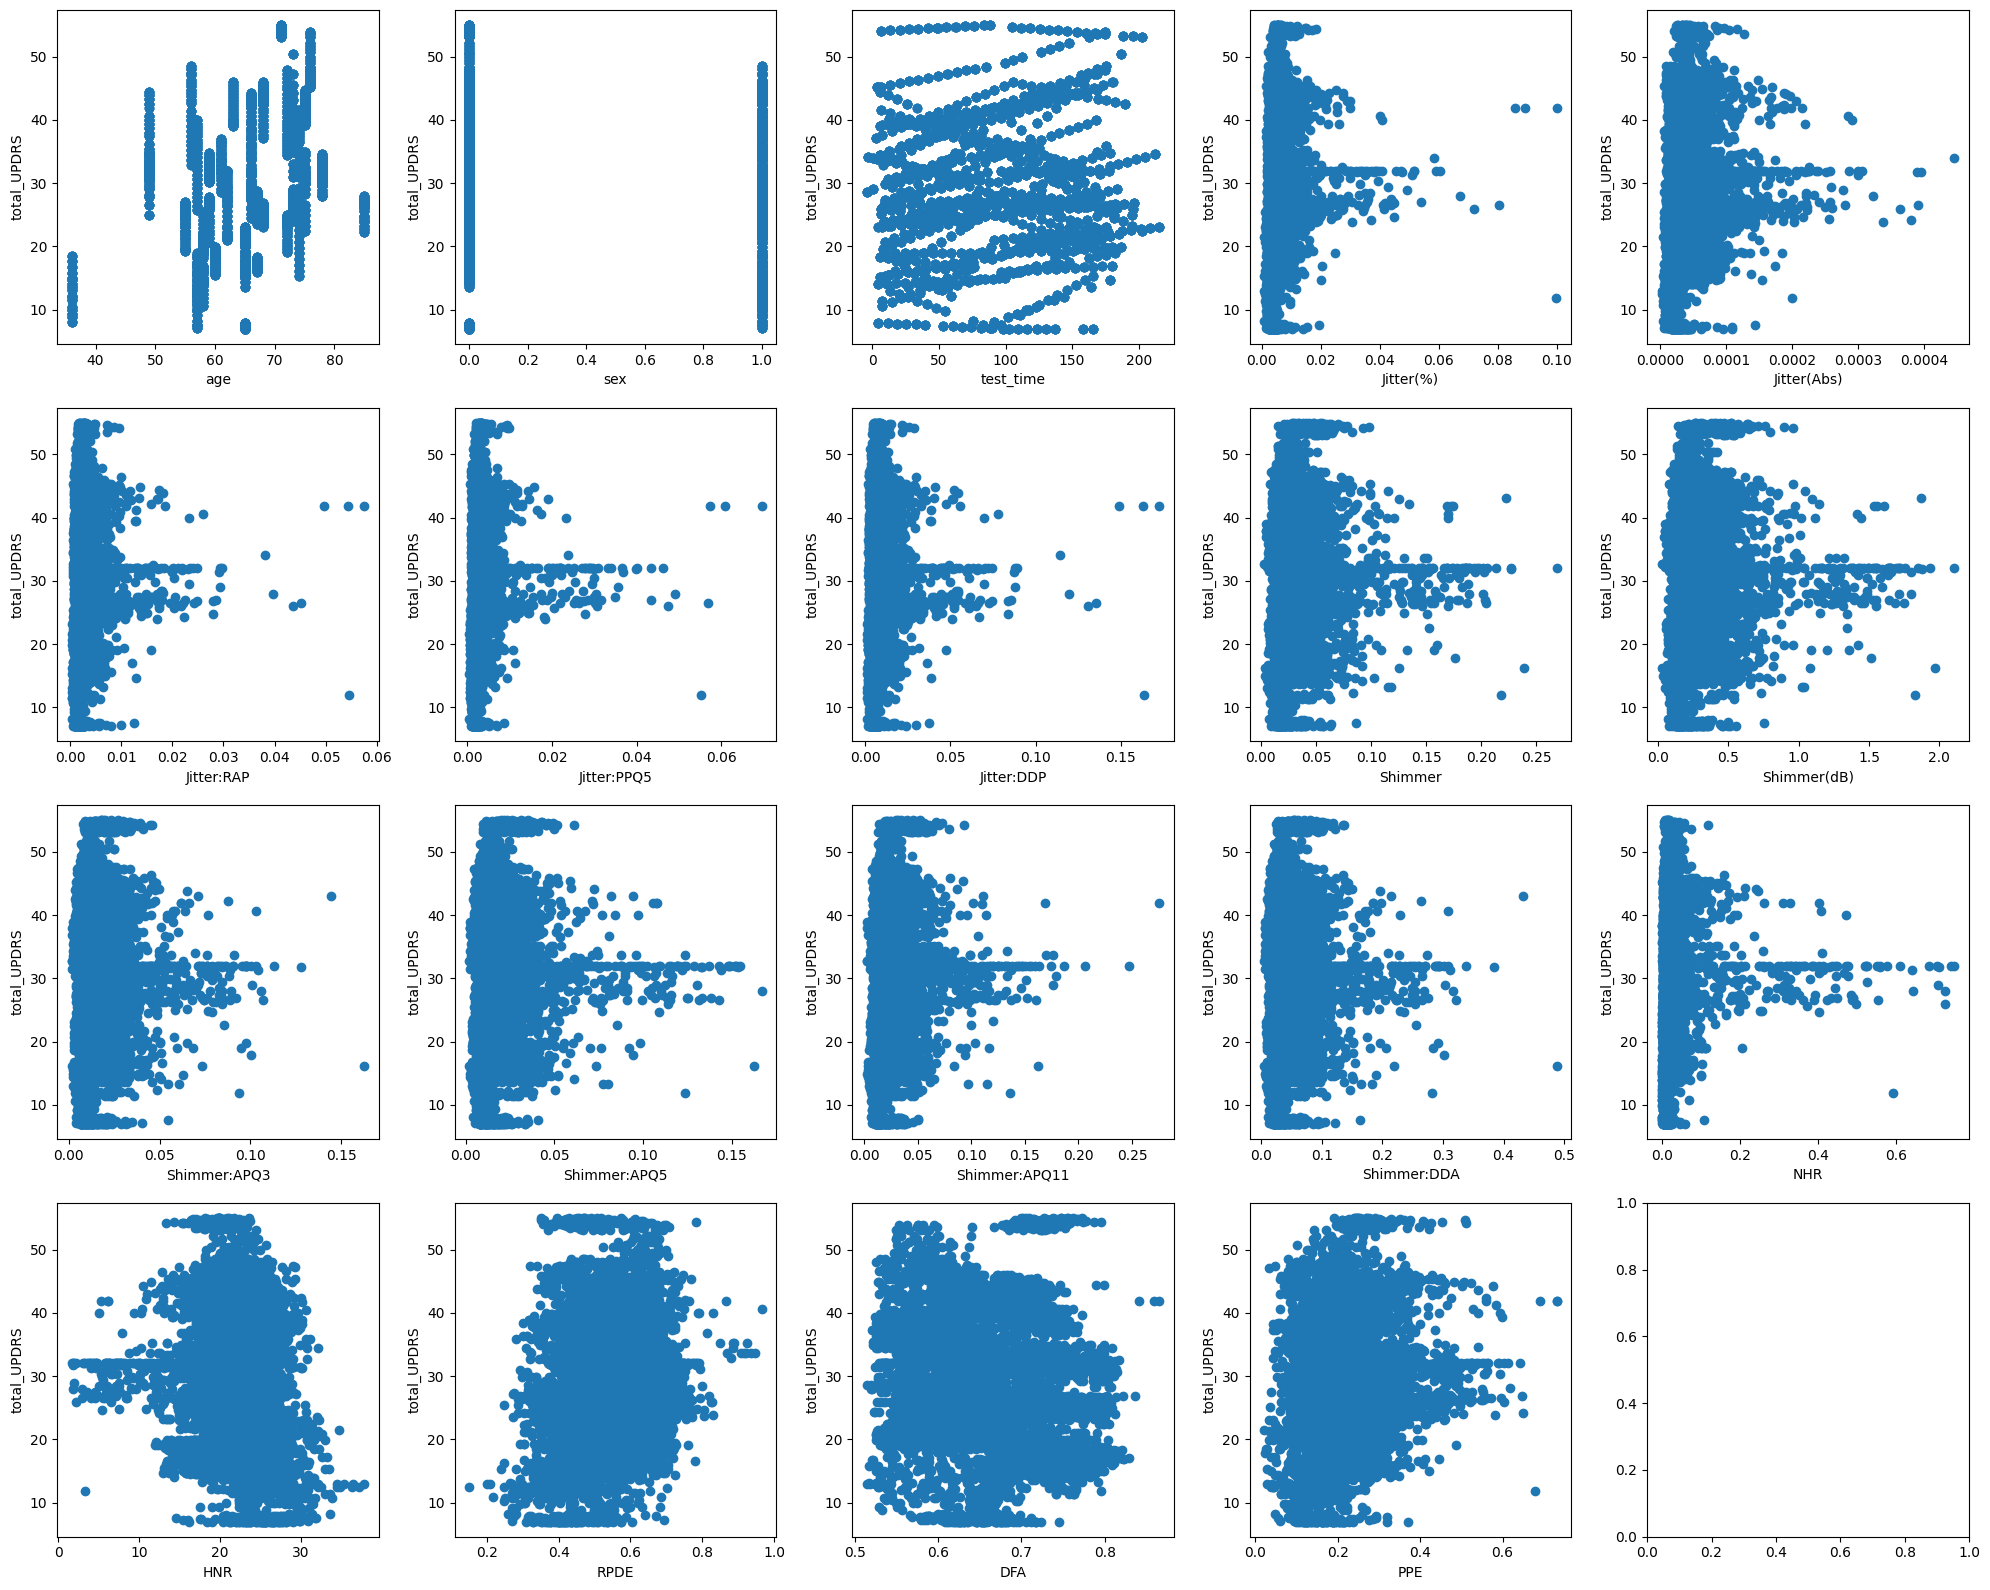

In [202]:
import matplotlib.pyplot as plt
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
axes = axes.flatten() # flatten the axes array to iterate over it easily

# Plot each column against total_UPDRS
i = 0
for column in data.columns:
  if column == 'total_UPDRS' or column == 'motor_UPDRS':
    continue
  ax = axes[i] # select the next subplot
  ax.scatter(data[column], data['total_UPDRS'])
  ax.set_ylabel('total_UPDRS')
  ax.set_xlabel(column)
  i += 1
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Goal: predict the UPDRS score

In [203]:
if 'subject#' in data.columns:
  print('Dropping subject#')
  # Drop the subject # column because it is useless
  data = data.drop('subject#', axis=1)
else:
  print('subject# not in data')

subject# not in data


### Split into training and test sets

In [204]:
list(data.columns)

['age',
 'sex',
 'test_time',
 'motor_UPDRS',
 'total_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [205]:
X = data.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)
y = data['total_UPDRS']

In [206]:
y.head()

0    34.398
1    34.894
2    35.389
3    35.810
4    36.375
Name: total_UPDRS, dtype: float64

In [207]:
X.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [208]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(5875, 4700, 1175)

In [209]:
X.shape

(5875, 19)

In [210]:
# import tensorflow as tf
# from tensorflow.keras import Sequential as Sequential
# from tensorflow.keras.layers import Dense as Dense
# tf.random.set_seed(42)

# model = Sequential([
#   Dense(4, activation='relu'),
#   Dense(4, activation='relu'),
#   Dense(4, activation='relu'),
#   Dense(1)
# ])

# model.compile(loss='mae',
#   optimizer=tf.keras.optimizers.Adam(),
#   metrics=['mae']
# )

# history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
147/147 [==============================] - 0s 435us/step - loss: 32.9473 - mae: 32.9473
Epoch 2/100
147/147 [==============================] - 0s 343us/step - loss: 13.2918 - mae: 13.2918
Epoch 3/100
147/147 [==============================] - 0s 345us/step - loss: 10.7298 - mae: 10.7298
Epoch 4/100
147/147 [==============================] - 0s 376us/step - loss: 9.4729 - mae: 9.4729
Epoch 5/100
147/147 [==============================] - 0s 350us/step - loss: 8.8336 - mae: 8.8336
Epoch 6/100
147/147 [==============================] - 0s 355us/step - loss: 8.7038 - mae: 8.7038
Epoch 7/100
147/147 [==============================] - 0s 344us/step - loss: 8.6463 - mae: 8.6463
Epoch 8/100
147/147 [==============================] - 0s 354us/step - loss: 8.6187 - mae: 8.6187
Epoch 9/100
147/147 [==============================] - 0s 343us/step - loss: 8.5731 - mae: 8.5731
Epoch 10/100
147/147 [==============================] - 0s 345us/step - loss: 8.5385 - mae: 8.5385
Epoch 11/100


In [211]:
# y_test.describe()

count    1175.000000
mean       28.788817
std        10.531260
min         7.000000
25%        21.333000
50%        27.292000
75%        35.709500
max        54.992000
Name: total_UPDRS, dtype: float64

In [212]:
# model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 442us/step - loss: 8.1110 - mae: 8.1110


[8.11101245880127, 8.11101245880127]

Text(0.5, 0, 'epochs')

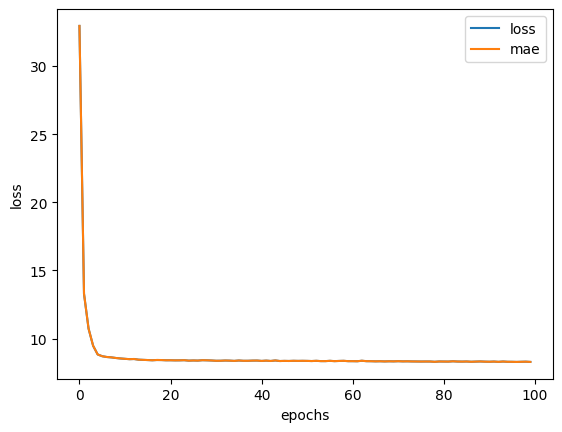

In [213]:
# plot history (also knowns as loss or training curve)
# pd.DataFrame(history.history).plot()
# plt.ylabel("loss")
# plt.xlabel("epochs")

In [214]:
# X_test.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5366,66,0,138.400,0.00989,0.000070,0.00620,0.00419,0.01860,0.04139,0.329,0.02494,0.02016,0.02679,0.07481,0.049333,23.543,0.49315,0.64472,0.14389
4326,36,1,143.780,0.00427,0.000024,0.00199,0.00263,0.00596,0.02108,0.208,0.00935,0.01128,0.01660,0.02806,0.013491,23.979,0.53244,0.63642,0.23252
199,58,0,10.815,0.00970,0.000066,0.00510,0.00490,0.01530,0.05133,0.568,0.02949,0.03156,0.03813,0.08846,0.039924,18.384,0.49252,0.75548,0.23707
3260,60,0,39.828,0.00924,0.000071,0.00335,0.00402,0.01004,0.07344,0.672,0.03767,0.04703,0.04819,0.11301,0.081412,14.349,0.78034,0.78442,0.34791
4955,62,1,103.310,0.03199,0.000183,0.01681,0.02091,0.05043,0.12491,1.221,0.06463,0.07247,0.07086,0.19388,0.471650,6.092,0.71957,0.58285,0.46459


37/37 [==============================] - 0s 345us/step


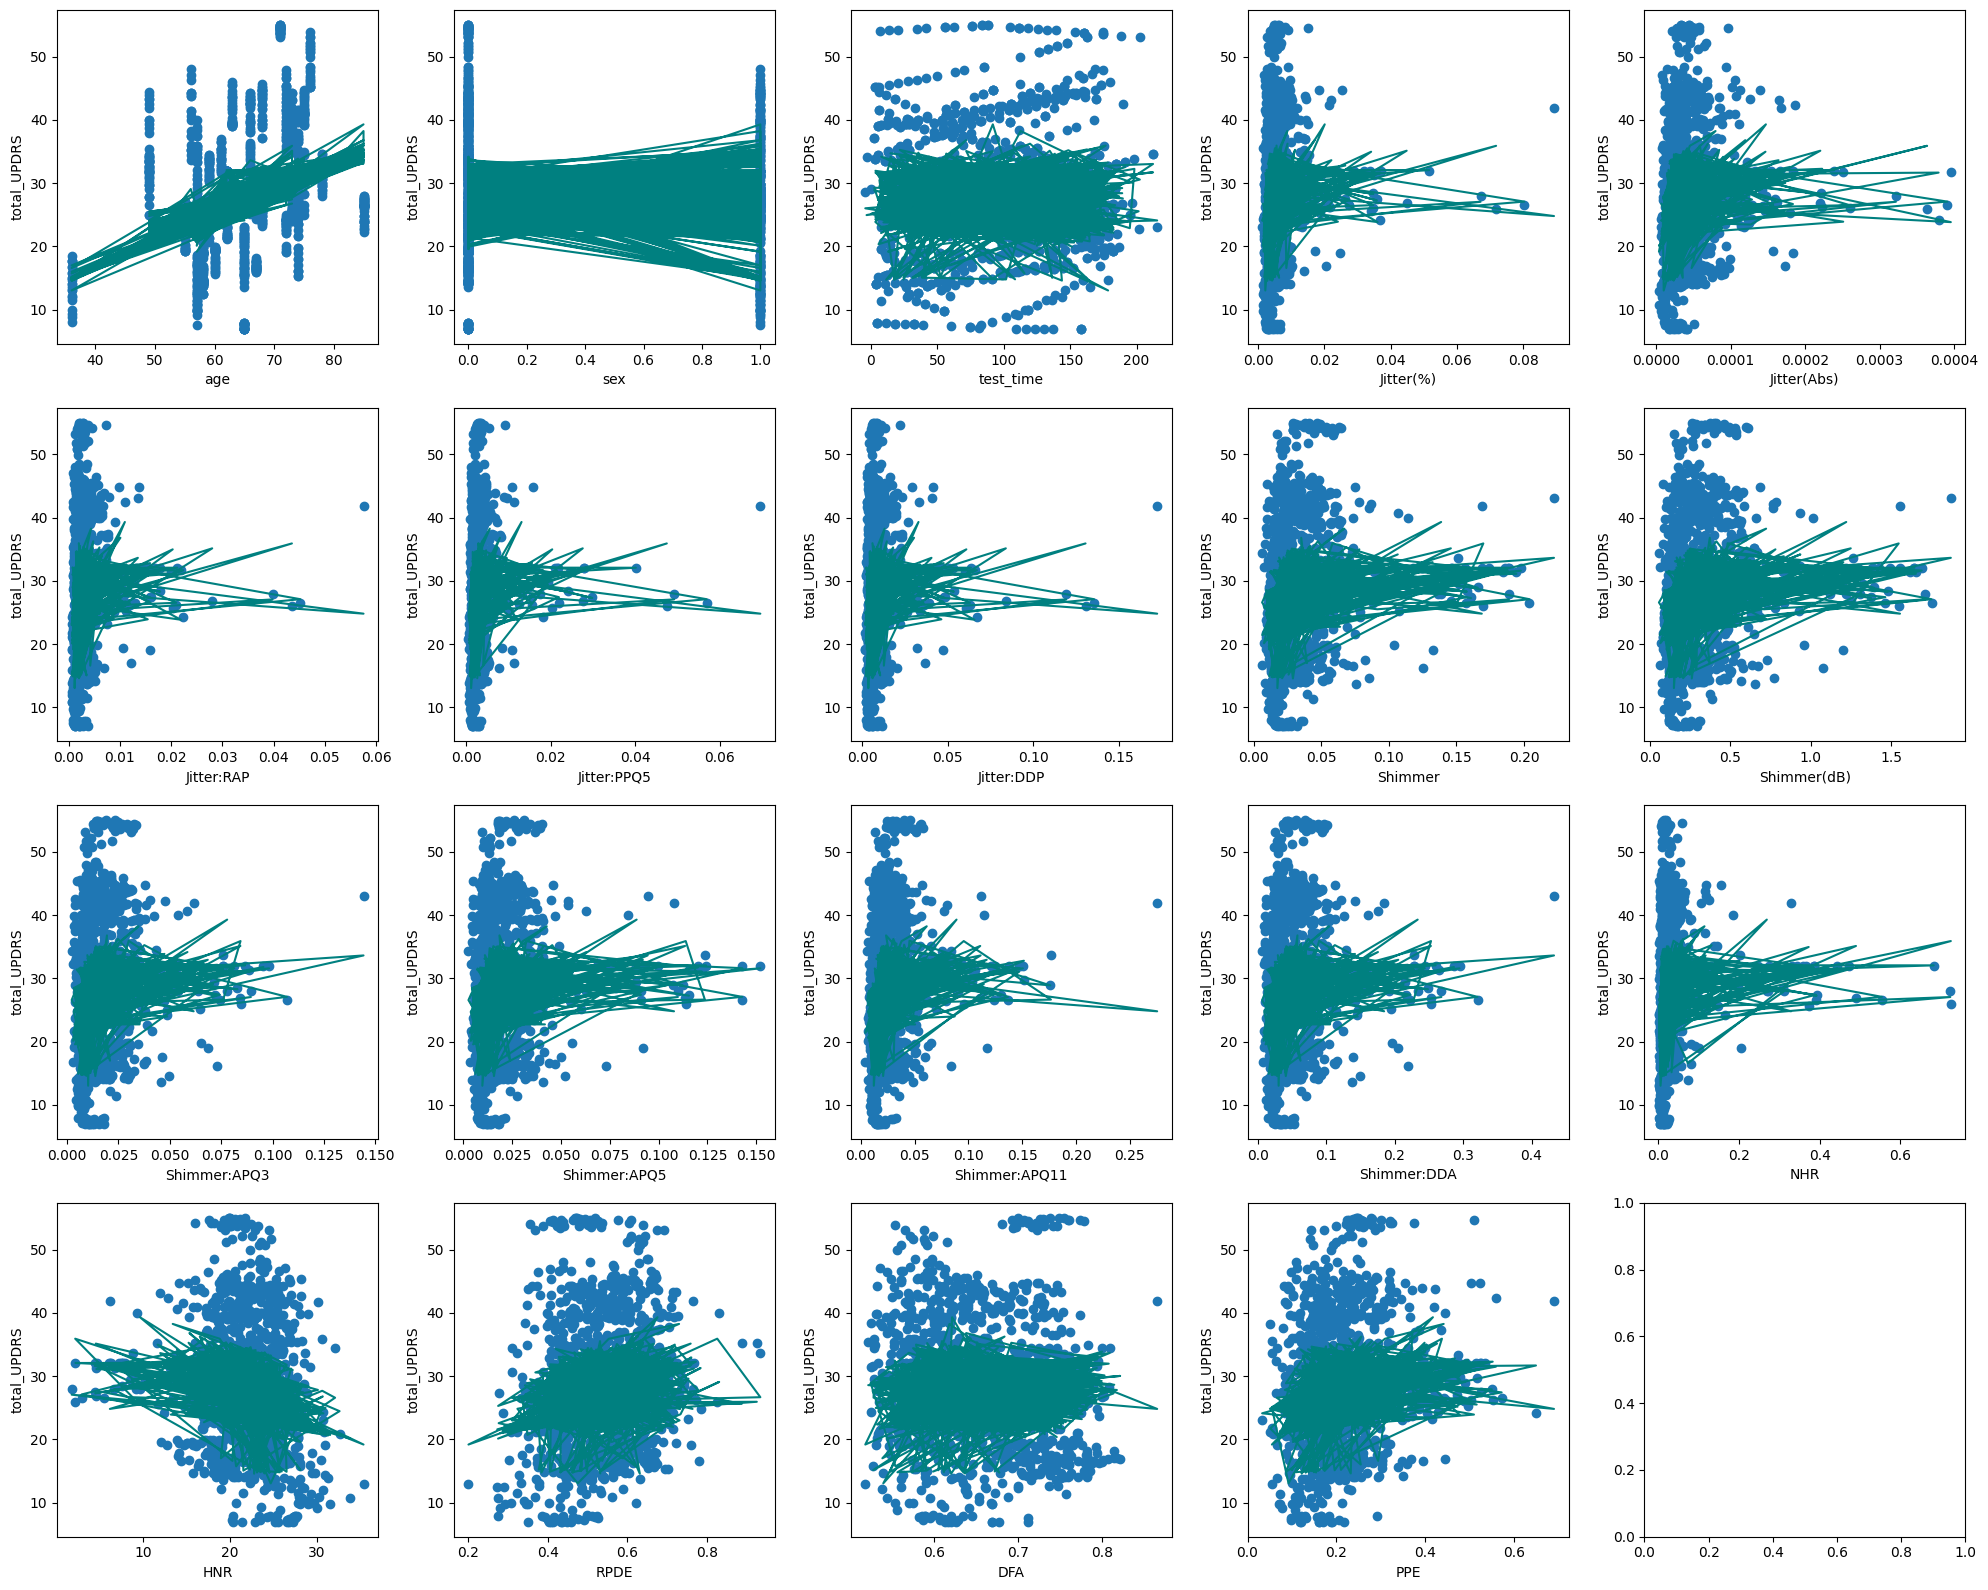

In [215]:
# import matplotlib.pyplot as plt
# # Create subplots
# fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
# axes = axes.flatten() # flatten the axes array to iterate over it easily
# y_pred = model.predict(X_test)
# # Plot each column against total_UPDRS
# for i, c in enumerate(X_test.columns):
#   ax = axes[i] # select the next subplot
#   ax.scatter(X_test[c], y_test, label='True data')
#   ax.plot(X_test[c], y_pred, label='Predicted data', color='teal')
#   ax.set_ylabel('total_UPDRS')
#   ax.set_xlabel(c)
    
# # Adjust spacing between subplots
# plt.tight_layout()

# # Display the plot
# plt.show()

In [216]:
len(X_test.columns)

19

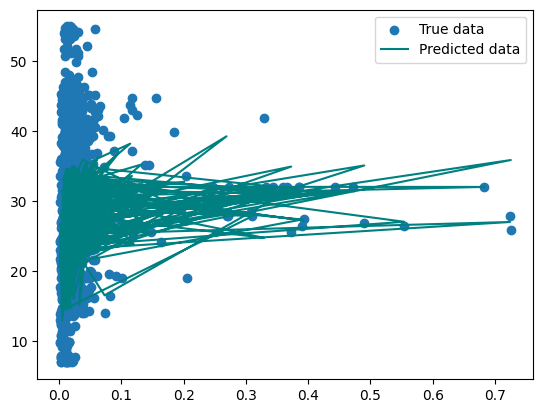

In [217]:
# i = 0
# plt.scatter(X_test['NHR'], y_test, label='True data')
# plt.plot(X_test['NHR'], y_pred, label='Predicted data', color='teal')
# plt.legend()
# plt.show()

In [218]:
# y_pred.shape

(1175, 1)

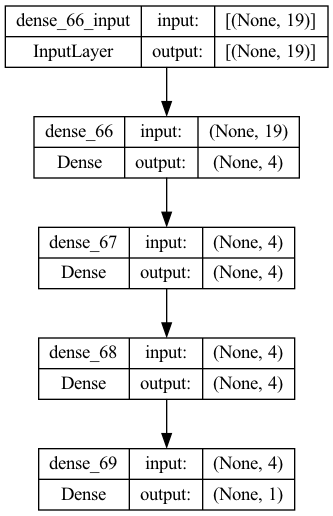

In [219]:
# from tensorflow.keras.utils import plot_model
# plot_model(model=model, show_shapes=True)

## Normalizing the data

In [220]:
numeric_cols = list(X.drop('sex', axis=1).columns)

In [221]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer - no need to transform target variable, just features
ct = make_column_transformer(
  (MinMaxScaler(), numeric_cols), # turn all values in these columns between 0 and 1
  (OneHotEncoder(handle_unknown='ignore'), ['sex']) 
)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = pd.DataFrame(ct.transform(X_train))
X_test_normal = pd.DataFrame(ct.transform(X_test))


In [222]:
pd.DataFrame(X_train_normal).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.489796,0.459897,0.047297,0.105562,0.045220,0.045853,0.045343,0.157435,0.177799,0.134236,0.153138,0.149497,0.134194,0.057049,0.392175,0.489804,0.699762,0.306767,1.0,0.0
1,0.469388,0.259062,0.032271,0.092322,0.024363,0.028803,0.024425,0.030839,0.034118,0.025518,0.031863,0.037650,0.025498,0.024471,0.548073,0.530550,0.661838,0.322942,1.0,0.0
2,0.653061,0.372016,0.067164,0.085239,0.068291,0.062572,0.068414,0.163460,0.203748,0.150192,0.132481,0.126482,0.150172,0.047864,0.447399,0.612507,0.421399,0.359476,0.0,1.0
3,0.816327,0.498891,0.050928,0.137231,0.047434,0.041880,0.047558,0.052867,0.060067,0.039364,0.051611,0.056864,0.039364,0.046992,0.507152,0.556573,0.199502,0.345006,1.0,0.0
4,0.857143,0.890377,0.039028,0.059503,0.030639,0.041218,0.030762,0.144745,0.182605,0.094126,0.141992,0.187924,0.094106,0.027853,0.575298,0.386843,0.412852,0.279250,1.0,0.0


In [223]:
import tensorflow as tf
from tensorflow.keras import Sequential as Sequential
from tensorflow.keras.layers import Dense as Dense
tf.random.set_seed(42)

model_n = Sequential([
  Dense(4, activation='relu'),
  Dense(4, activation='relu'),
  Dense(4, activation='softplus'),
  Dense(1)
])

model_n.compile(loss='mae',
  optimizer=tf.keras.optimizers.Adam(),
  metrics=['mae']
)

history_n = model_n.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
147/147 [==============================] - 1s 455us/step - loss: 26.5554 - mae: 26.5554
Epoch 2/100
147/147 [==============================] - 0s 373us/step - loss: 23.1663 - mae: 23.1663
Epoch 3/100
147/147 [==============================] - 0s 341us/step - loss: 10.8149 - mae: 10.8149
Epoch 4/100
147/147 [==============================] - 0s 349us/step - loss: 8.7204 - mae: 8.7204
Epoch 5/100
147/147 [==============================] - 0s 361us/step - loss: 8.6303 - mae: 8.6303
Epoch 6/100
147/147 [==============================] - 0s 364us/step - loss: 8.5486 - mae: 8.5486
Epoch 7/100
147/147 [==============================] - 0s 364us/step - loss: 8.4891 - mae: 8.4891
Epoch 8/100
147/147 [==============================] - 0s 478us/step - loss: 8.4392 - mae: 8.4392
Epoch 9/100
147/147 [==============================] - 0s 353us/step - loss: 8.3951 - mae: 8.3951
Epoch 10/100
147/147 [==============================] - 0s 359us/step - loss: 8.3584 - mae: 8.3584
Epoch 11/100


In [224]:
model_n.evaluate(X_test_normal, y_test)

37/37 [==============================] - 0s 414us/step - loss: 7.9385 - mae: 7.9385


[7.938472270965576, 7.938472270965576]

Text(0.5, 0, 'epochs')

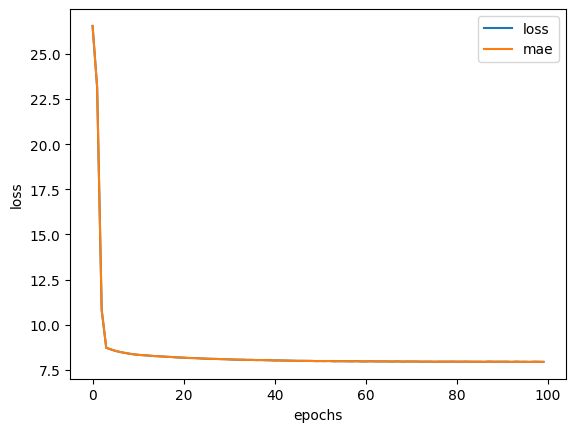

In [225]:
# plot history (also knowns as loss or training curve)
pd.DataFrame(history_n.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

37/37 [==============================] - 0s 360us/step


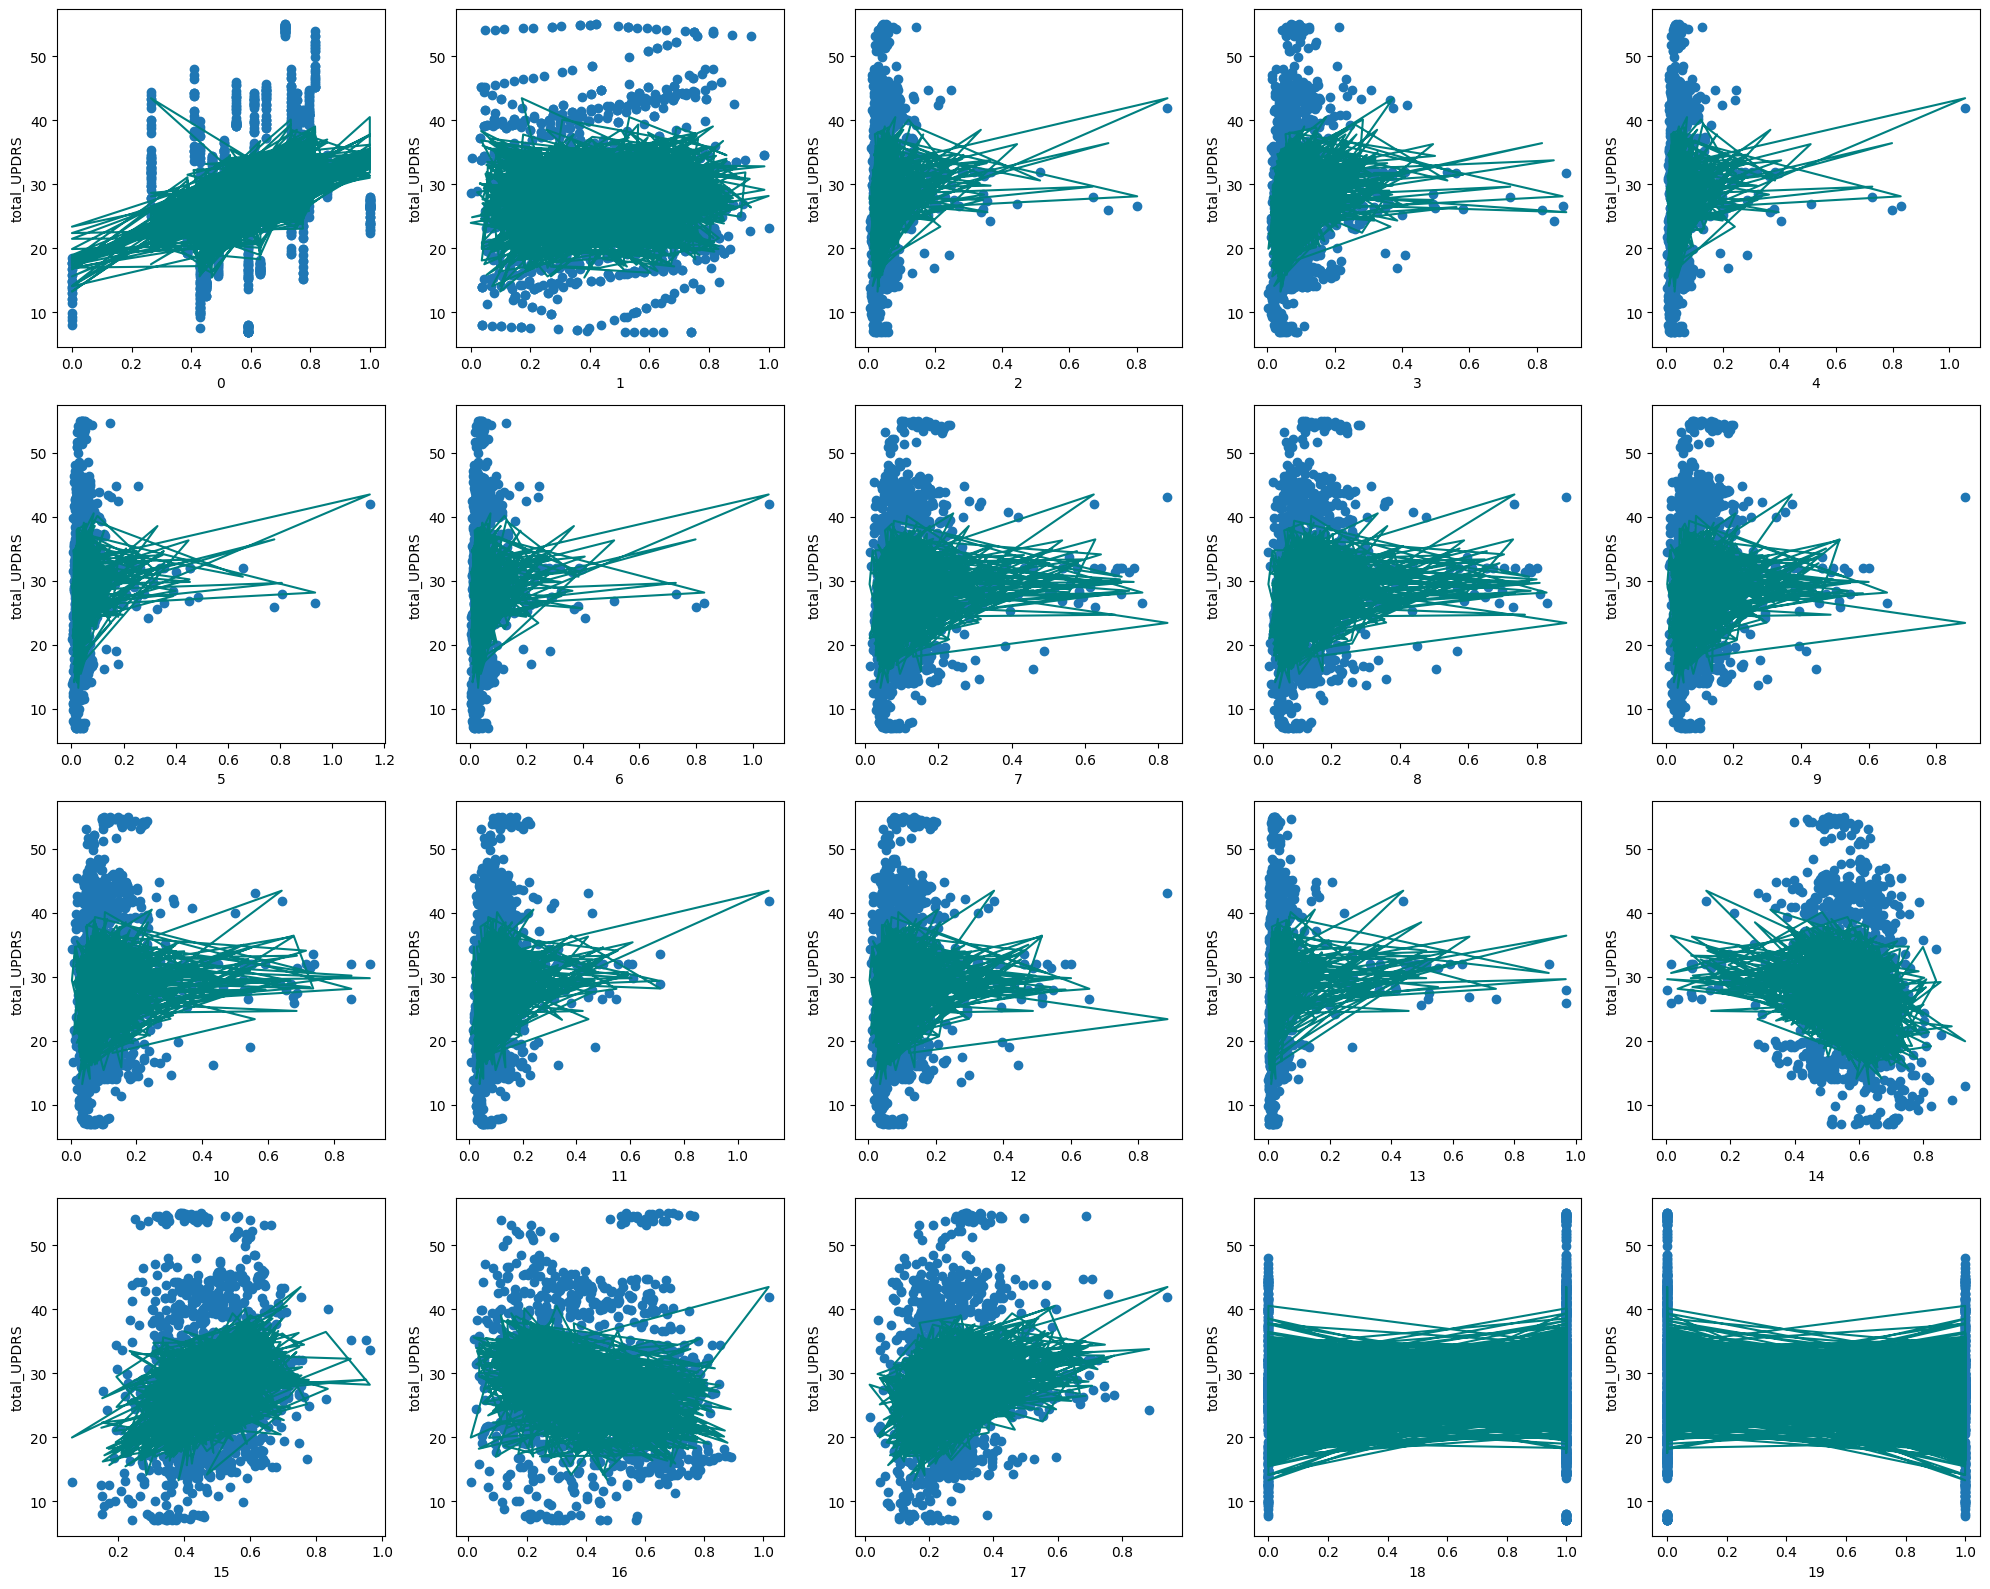

In [226]:
import matplotlib.pyplot as plt
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
axes = axes.flatten() # flatten the axes array to iterate over it easily

# Make predictions
y_pred = model_n.predict(X_test_normal)

# Plot each column against total_UPDRS
for i, c in enumerate(X_test_normal.columns):
  ax = axes[i] # select the next subplot
  ax.scatter(X_test_normal[c], y_test, label='True data')
  ax.plot(X_test_normal[c], y_pred, label='Predicted data', color='teal')
  ax.set_ylabel('total_UPDRS')
  ax.set_xlabel(c)
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [227]:
pd.DataFrame(X_test_normal)[0].shape

(1175,)

In [228]:
X_test_normal[0].shape

(1175,)

In [229]:
# import tensorflow as tf
# from tensorflow.keras import Sequential as Sequential
# from tensorflow.keras.layers import Dense as Dense
# tf.random.set_seed(42)

# model_n = Sequential([
#   Dense(4, activation='relu'),
#   Dense(4, activation='relu'),
#   Dense(4, activation='softplus'),
#   Dense(1)
# ])

# model_n.compile(loss='mae',
#   optimizer=tf.keras.optimizers.Adam(),
#   metrics=['mae']
# )

# history_n = model_n.fit(X_train_normal, y_train, epochs=100, verbose=1)

In [230]:
def make_model(X_train, y_train, epochs=100, curvy=False):
  import tensorflow as tf
  from tensorflow.keras import Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.regularizers import l2
  tf.random.set_seed(42)

  model = Sequential()

  if curvy:
    model.add(Dense(4, activation='sigmoid', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='sigmoid', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='sigmoid', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='sigmoid', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='sigmoid', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='sigmoid', kernel_regularizer=l2(0.01)))
  else:
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))

  model.add(Dense(1))
  
  model.compile(loss='mae',
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=['mae']
  )

  history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
  return model, history
      

In [231]:
def plot_model_preds(model, X_test, y_test):
  import matplotlib.pyplot as plt
  # Create subplots
  fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
  axes = axes.flatten() # flatten the axes array to iterate over it easily

  # Make predictions
  y_pred = model_n.predict(X_test)

  # Close predictions
  close = abs(y_pred.reshape(len(y_pred),) - y_test) <= 5

  # Plot each column against total_UPDRS
  i = 0
  for c in X_test.columns:
    ax = axes[i] # select the next subplot
    ax.scatter(X_test[c], y_test, label='True data')
    ax.scatter(X_test[c], y_pred, label='Predicted data', color='teal')
    ax.set_ylabel('total_UPDRS')
    ax.set_xlabel(c)
    i += 1
      
  # Adjust spacing between subplots
  plt.tight_layout()

  # Display the plot
  plt.show()

In [232]:
def plot_loss(history):
  import matplotlib.pyplot as plt

  # plot history (also knowns as loss or training curve)
  plt.plot(pd.DataFrame(history.history))
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  #plt.title("Loss Curve")
  plt.show()

In [247]:
y_test.describe()

count    1175.000000
mean       28.788817
std        10.531260
min         7.000000
25%        21.333000
50%        27.292000
75%        35.709500
max        54.992000
Name: total_UPDRS, dtype: float64

In [248]:
close = abs(y_pred.reshape(len(y_pred),) - y_test) <= 5

5366    False
4326    False
199     False
3260    False
4955     True
        ...  
4487     True
693     False
2559     True
2029    False
287      True
Name: total_UPDRS, Length: 1175, dtype: bool

In [233]:
curvy_model, history = make_model(X_train_normal, y_train, curvy=False)

37/37 [==============================] - 0s 359us/step


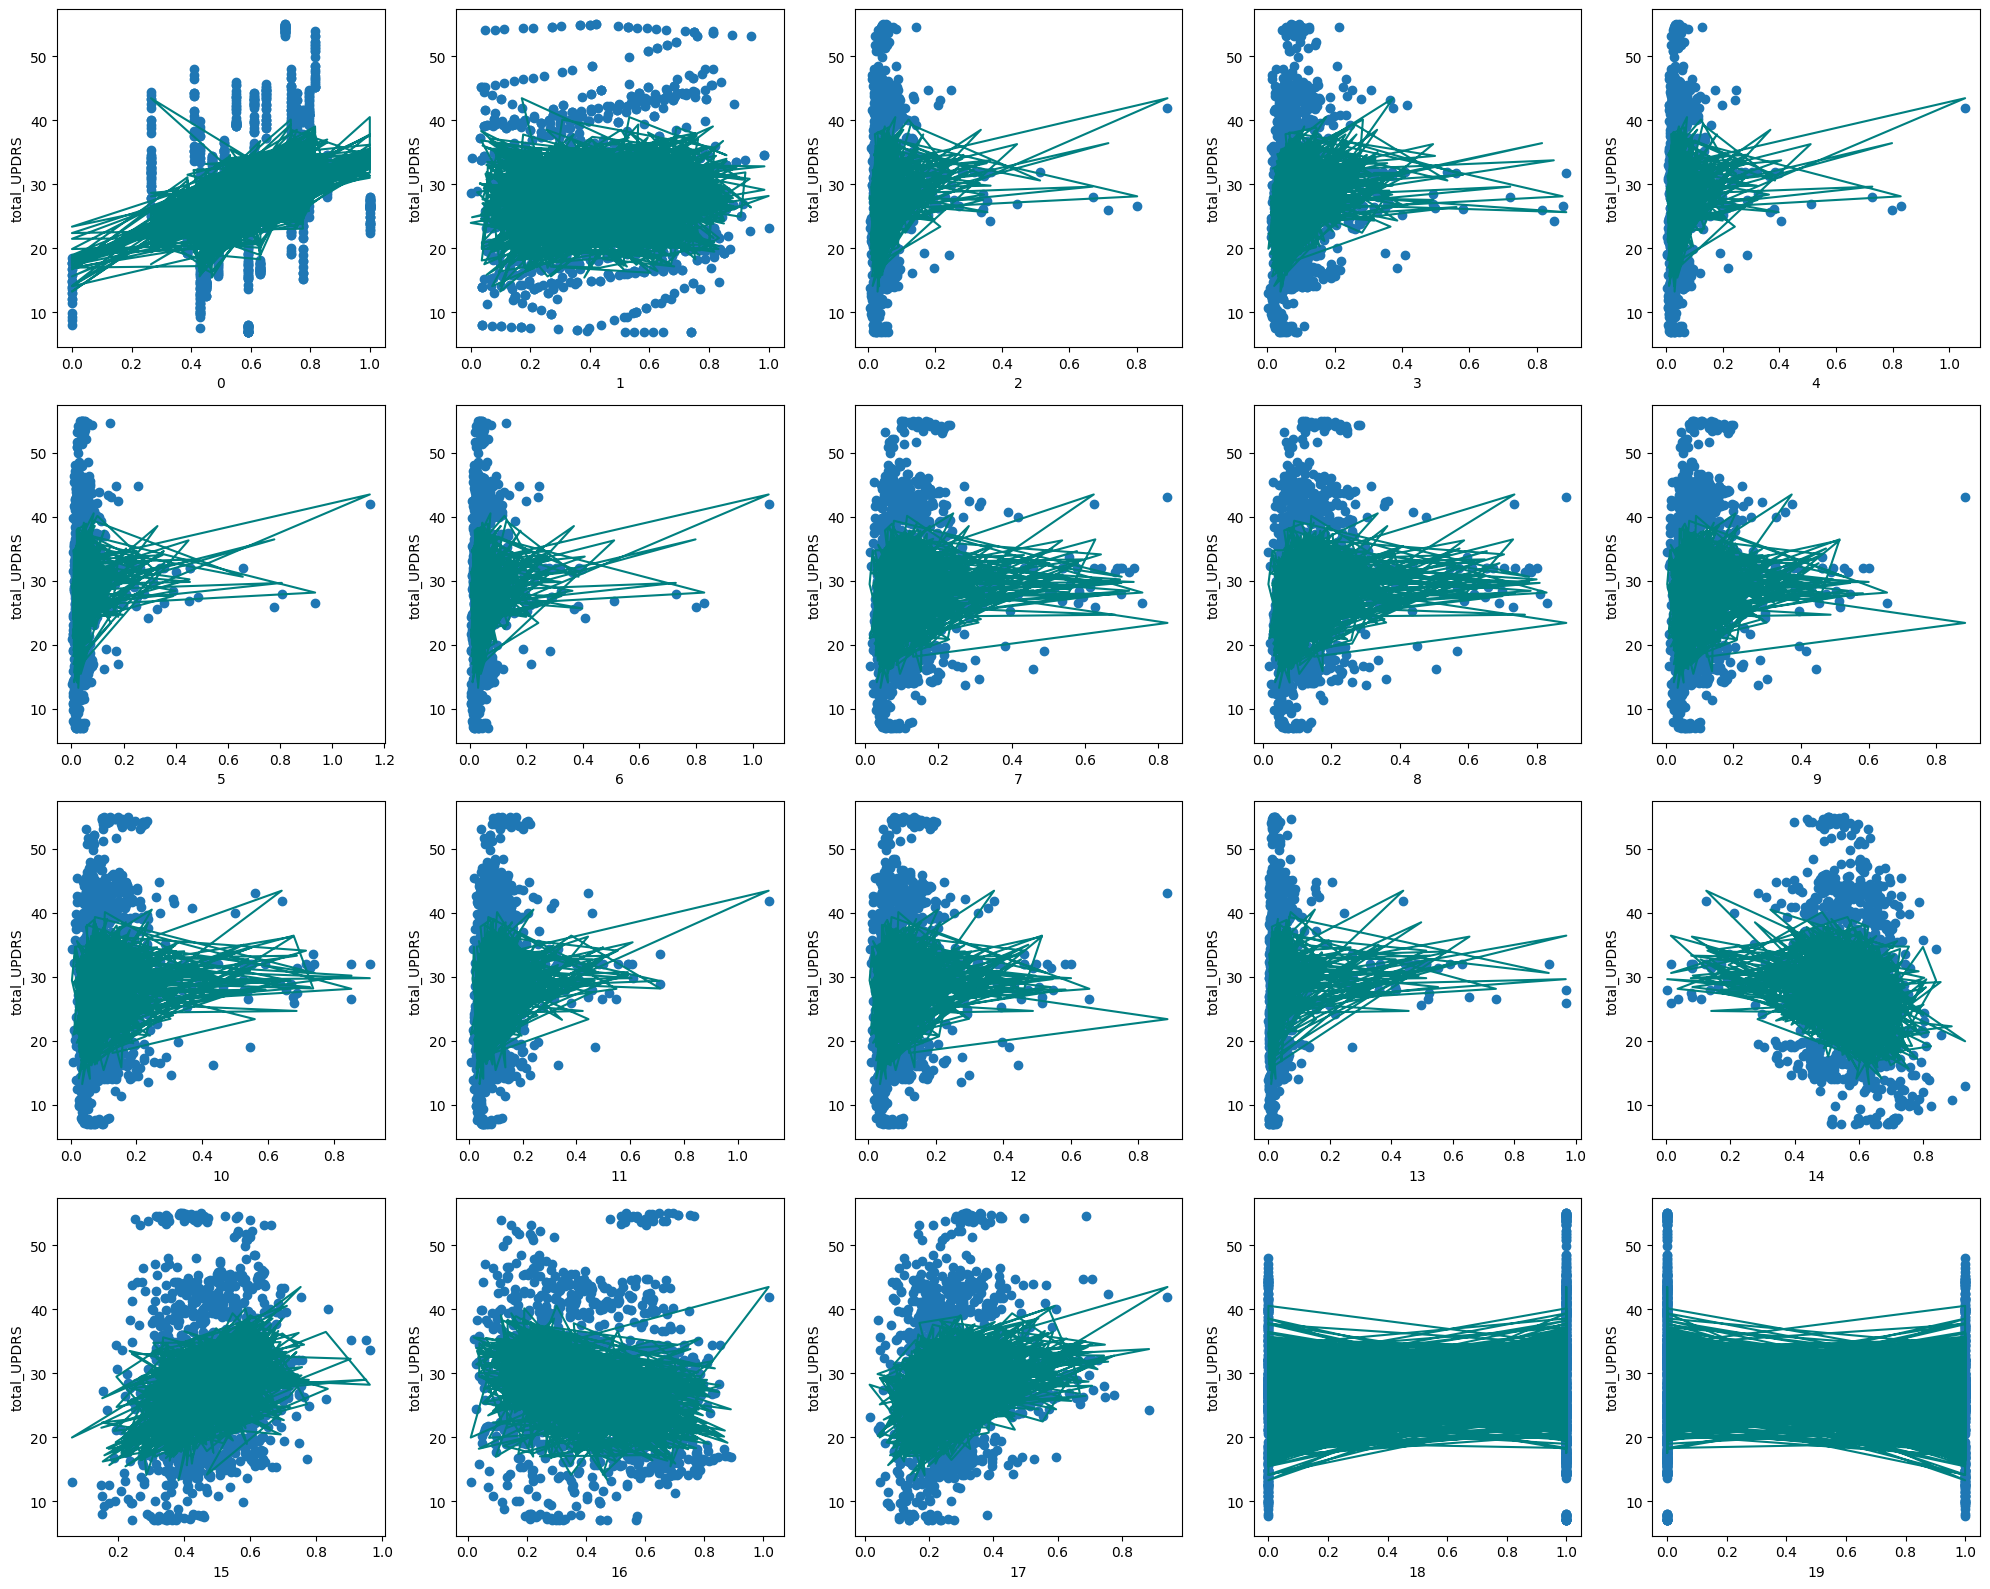

In [234]:
plot_model_preds(curvy_model, X_test_normal, y_test)

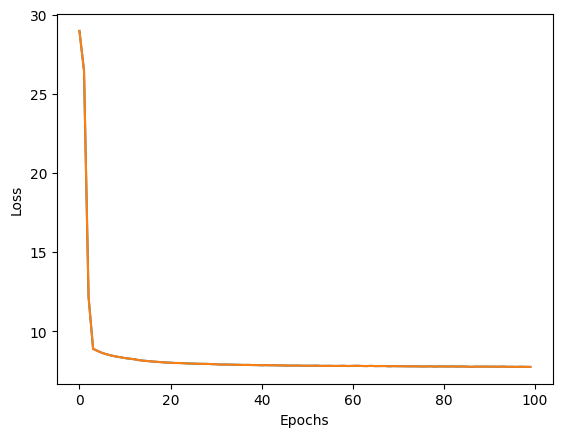

In [235]:
plot_loss(history)